# K Means Mall spending prediciton
Morariu Tudor

### Importam librariile necesare.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
from time import gmtime, strftime

def watermark():
  return "Tudor Morariu, generated at: " + strftime("%H:%M:%S", gmtime());

In [3]:
# Definim dark-mode pentru matplotlib pentru ca e cool
plt.style.use('dark_background')

### Citim dataset-ul

In [482]:
data = pd.read_csv("Mall_Customers.csv");
display(data);

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


*  Coloana "Gender" este un string. Trebuie sa il transformam in float.
*  Coloana "CustomerID" este inutila.
*  Folosim Label Encoder din sklearn pentru a encoda $Male$ in $1$, $Female$ in $0$.


In [483]:
le = LabelEncoder()

data.drop(columns=['CustomerID'], inplace=True);
data['Gender'] = le.fit_transform(data['Gender']);

display(data);

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Plotam datele.

### Histograme si distributie

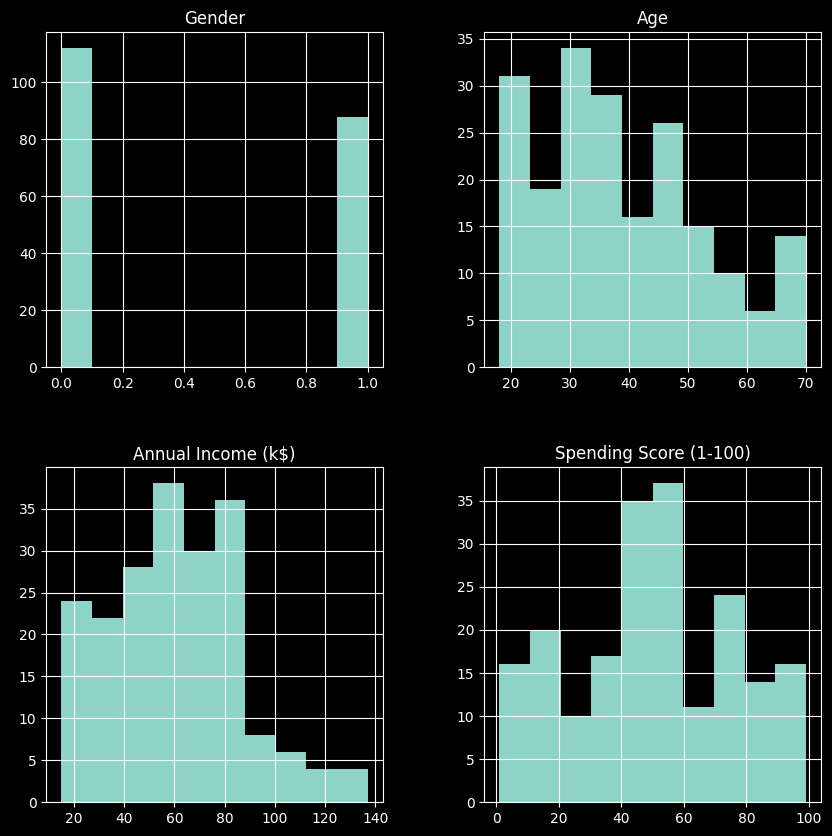

In [484]:
# Facem o histograma pentru fiecare feture pentru a vedea distributia datelor.
data.hist(figsize=(10, 10));

*   **Obs**: Coloana de "Gender" este relativ uniforma.

### PCA

Vom face un plot $2D$ a feature-urilor folosind PCA, pentru a vizualiza clusterele.

In [485]:
from sklearn.decomposition import PCA

pca3d = PCA(n_components=3);
pca2d = PCA(n_components=2);

pca3d.fit(data);
pca2d.fit(data);

points2d = pca2d.fit_transform(data);

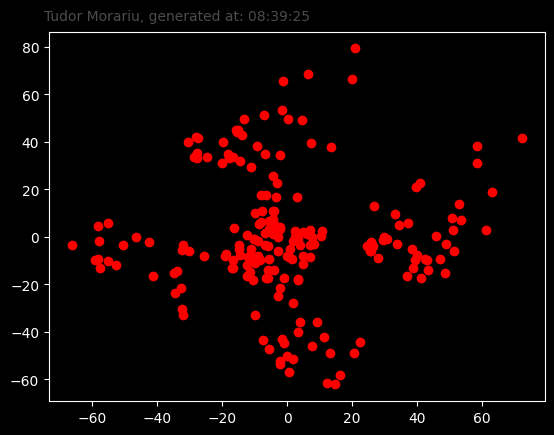

In [486]:
pointsx = [];
pointsy = [];

for x, y in points2d:
    pointsx.append(x);
    pointsy.append(y);

plt.text(7, 90, watermark(), fontsize=10, color="white", ha="right", va="bottom", alpha=0.3, rotation=0)
plt.plot(pointsx, pointsy, 'ro')

*   **Obs**: Datele sunt destul de sparse.
*   **Obs**: Se pot observa $5$ clustere.

### Matricea de corelatie

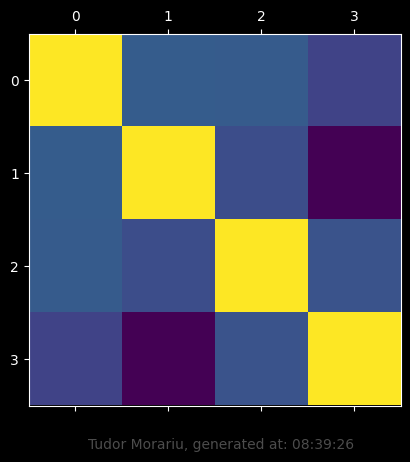

In [487]:
# Plotam matricea de coreleatie.
plt.matshow(data.corr())
plt.text(3, 4, watermark(), fontsize=10, color="white", ha="right", va="bottom", alpha=0.3, rotation=0)

plt.show()

*   **Obs**: Din matricea de corelatie observam ca "Spending Score" depinde de "Age"

In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


Toate valorile sunt $int$ deci putem normaliza

## Pregatirea Modelului

### Normalizare

In [490]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data = pd.DataFrame(scaler.fit_transform(data))

In [491]:
data.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,0.400962,0.373443,0.502041
std,0.497633,0.268635,0.215285,0.263505
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.206731,0.217213,0.344388
50%,0.000000,0.346154,0.381148,0.500000
75%,1.000000,0.596154,0.516393,0.734694
max,1.000000,1.000000,1.000000,1.000000


### K-Means si Performanta Modelului

In [493]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

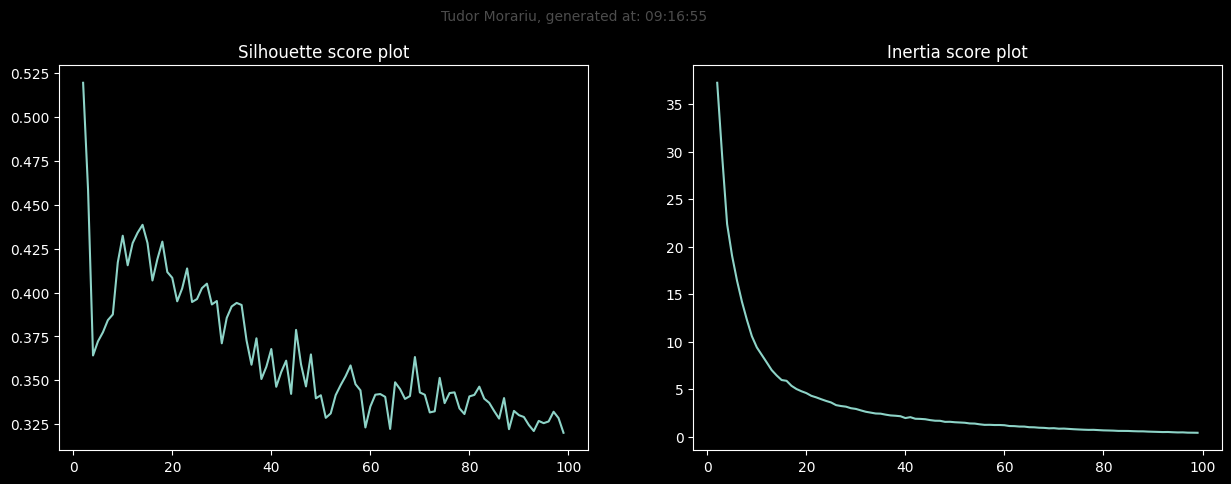

In [523]:
silhouette_scores = [];
inertia_scores = [];

for centr in range(2, 100):
    kmeans = KMeans(n_clusters=centr, init='k-means++', max_iter=300, n_init=10, random_state=1)
    y_kmeans = kmeans.fit_predict(data)

    silhouette_avg = silhouette_score(data, y_kmeans)
    silhouette_scores.append(silhouette_avg);
    
    inertia_scores.append(kmeans.inertia_)

f, pl = plt.subplots(1, 2);

f.set_figheight(5)
f.set_figwidth(15)

pl[0].plot(range(2, 100), silhouette_scores)
pl[0].set_title('Silhouette score plot')

pl[1].plot(range(2, 100), inertia_scores);
pl[1].set_title('Inertia score plot')

plt.text(0, 45, watermark(), fontsize=10, color="white", ha="right", va="top", alpha=0.3, rotation=0)
plt.show();


*   **Obs**: Din grafic, numarul optim de centroide este $5$, pentru a evita overfitting-ul

## Plotare 3D cu centroizi

### Obtinerea Centroizilor

Facem K-Means cu $5$ clustere si luam pozitia centroizilor

In [495]:
# Facem K-Means cu 5 centroide
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=3000, n_init=10, random_state=1)
y_kmeans = kmeans.fit_predict(data)

# Obinem pozitia centroizilor
centroids = kmeans.cluster_centers_

[[ 1.00000000e+00  7.28506787e-01  3.05689489e-01  3.67346939e-01]
 [-3.33066907e-16  2.00742240e-01  3.66120219e-01  6.80451128e-01]
 [ 1.00000000e+00  1.97115385e-01  3.85245902e-01  7.21173469e-01]
 [ 1.00000000e+00  3.03571429e-01  5.90163934e-01  9.47521866e-02]
 [-2.77555756e-16  5.79020979e-01  3.59165425e-01  3.44712430e-01]]


### PCA pentru datele normalizate si centroizi

In [496]:
pca3d = PCA(n_components=3).fit(data);

points3d = pca3d.fit_transform(data);
points3d_centroids = pca3d.fit_transform(centroids);

### Plotarea Centroizilor peste dataset

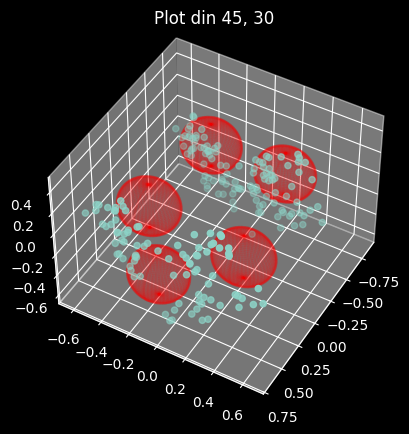

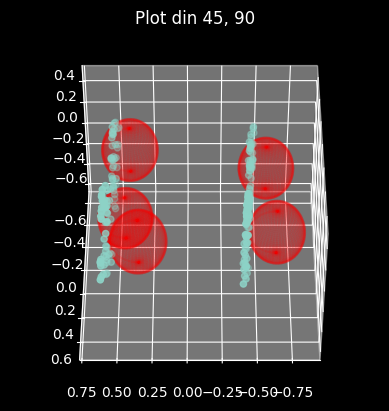

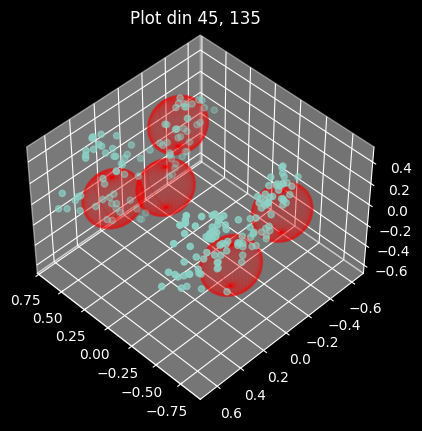

In [509]:
import numpy as np

fig1 = plt.figure(1)
fig2 = plt.figure(2)
fig3 = plt.figure(3)

ax1 = fig1.add_subplot(projection='3d')
ax2 = fig2.add_subplot(projection='3d')
ax3 = fig3.add_subplot(projection='3d')

pointsx = [];
pointsy = [];
pointsz = [];

for x, y, z in points3d:
    pointsx.append(x);
    pointsy.append(y);
    pointsz.append(z);

# Plotam dataset-ul
ax1.scatter(pointsx, pointsy, pointsz, marker='o')
ax2.scatter(pointsx, pointsy, pointsz, marker='o')
ax3.scatter(pointsx, pointsy, pointsz, marker='o')

for x_cen, y_cen, z_cen in points3d_centroids:

    center = (x_cen, y_cen, z_cen)
    radius = 0.2

    # Creeam sfera cu centru in fiecare centroid
    phi = np.linspace(0, np.pi, 100)
    theta = np.linspace(0, 2 * np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)

    x = center[0] + radius * np.sin(phi) * np.cos(theta)
    y = center[1] + radius * np.sin(phi) * np.sin(theta)
    z = center[2] + radius * np.cos(phi)

    # Plotam sferele
    ax1.plot_wireframe(x, y, z, color="r", alpha=0.1)
    ax2.plot_wireframe(x, y, z, color="r", alpha=0.1)
    ax3.plot_wireframe(x, y, z, color="r", alpha=0.1)

# Initializam pozitia "camerei"
ax1.view_init(45, 30);
ax2.view_init(45, 90);
ax3.view_init(45, 135);
# Plotam graficele
ax1.set_title("Plot din 45, 30")
ax2.set_title("Plot din 45, 90")
ax3.set_title("Plot din 45, 135")
plt.show()

*   **Obs**: Sferele nu sunt centrate exact unde ar fi optim intr-un plan $3D$ deoarece plot-ul este reprezentat folosing PCA, astfel pierzand informatie.